In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import os

In [3]:
all_files = sorted(os.listdir('/data/rl/madrona_3d_example/data_dump/'))

In [6]:
all_files

['ppo_2023-10-02 14:38:16.135891.pt',
 'ppo_2023-10-02 14:39:12.888377.pt',
 'ppo_2023-10-02 14:40:47.848069.pt',
 'ppo_2023-10-02 14:41:02.838543.pt',
 'ppo_2023-10-02 14:43:06.717041.pt',
 'ppo_2023-10-02 14:43:46.608576.pt',
 'ppo_2023-10-02 14:47:19.705899.pt',
 'ppo_2023-10-02 14:50:10.651071.pt',
 'ppo_2023-10-02 14:50:43.984866.pt',
 'ppo_2023-10-02 14:50:51.752584.pt',
 'ppo_2023-10-02 14:51:35.540180.pt',
 'ppo_2023-10-02 14:51:37.261836.pt',
 'ppo_2023-10-02 14:52:24.185190.pt',
 'ppo_2023-10-02 14:55:55.925223.pt',
 'ppo_2023-10-02 14:56:16.725866.pt',
 'ppo_2023-10-02 14:58:32.312836.pt',
 'ppo_2023-10-02 14:59:33.411974.pt',
 'ppo_2023-10-02 15:01:13.565350.pt',
 'ppo_2023-10-02 15:02:06.351907.pt',
 'ppo_2023-10-02 15:04:25.088664.pt',
 'ppo_2023-10-02 15:10:33.491999.pt',
 'ppo_2023-10-02 15:19:49.450491.pt',
 'ppo_2023-10-02 15:23:18.580102.pt',
 'ppo_2023-10-02 15:26:51.301051.pt',
 'ppo_2023-10-02 15:27:32.936305.pt',
 'ppo_2023-10-02 15:27:53.115497.pt',
 'ppo_2023-1

In [7]:
root_path = '/data/rl/madrona_3d_example/data_dump/'
all_rollouts = []
for file in all_files[-25:]:
    all_rollouts.append(torch.load(root_path + file))

Top-level structure
obs_tensors = [
        self_obs_tensor.view(batch_size, *self_obs_tensor.shape[2:]),
        partner_obs_tensor.view(batch_size, *partner_obs_tensor.shape[2:]),
        room_ent_obs_tensor.view(batch_size, *room_ent_obs_tensor.shape[2:]),
        door_obs_tensor.view(batch_size, *door_obs_tensor.shape[2:]),
        lidar_tensor.view(batch_size, *lidar_tensor.shape[2:]),
        steps_remaining_tensor.view(batch_size, *steps_remaining_tensor.shape[2:]),
        id_tensor,
    ]


In [8]:
len(all_rollouts[-1].obs) # 

7

In [9]:
all_rollouts[-1].obs[0].shape # 8, 5, 16384, 8: 8 bptt chunks, 5 steps per bptt chunk, 16384 environments, 8 SelfObs

torch.Size([8, 5, 16384, 8])

In [10]:
print(all_rollouts[-1].obs[0][:,0,0,2:5])

tensor([[-0.2251,  0.0251,  0.0000],
        [-0.2192,  0.0310,  0.0000],
        [ 0.2251,  0.0770,  0.0000],
        [ 0.2008,  0.1509,  0.0000],
        [ 0.1792,  0.2429,  0.0000],
        [ 0.1666,  0.2345,  0.0000],
        [ 0.1203,  0.2690,  0.0000],
        [ 0.0837,  0.2134,  0.0000]], device='cuda:0')


In [11]:
print(all_rollouts[-1].obs[0][:,0,4,2:5])

tensor([[-0.2081,  0.1172,  0.0000],
        [-0.2172,  0.0859,  0.0000],
        [ 0.0994,  0.0799,  0.0000],
        [ 0.1505,  0.1687,  0.0000],
        [ 0.1312,  0.2277,  0.0000],
        [ 0.0865,  0.2660,  0.0000],
        [ 0.0542,  0.2025,  0.0000],
        [ 0.0243,  0.1571,  0.0000]], device='cuda:0')


## Try plotting this

In [12]:
import matplotlib.pyplot as plt

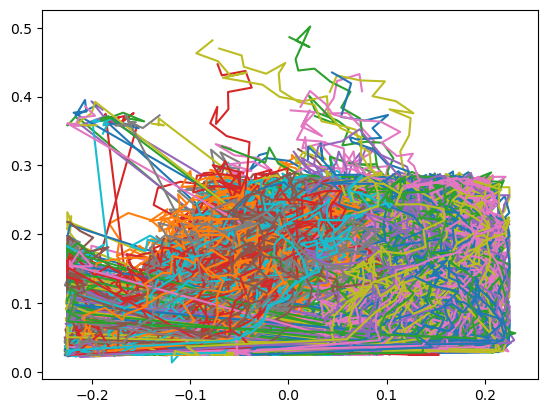

In [13]:
for i in range(1000):
    plt.plot(all_rollouts[-1].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-1].obs[0][:,:,i,3].cpu().reshape(-1))

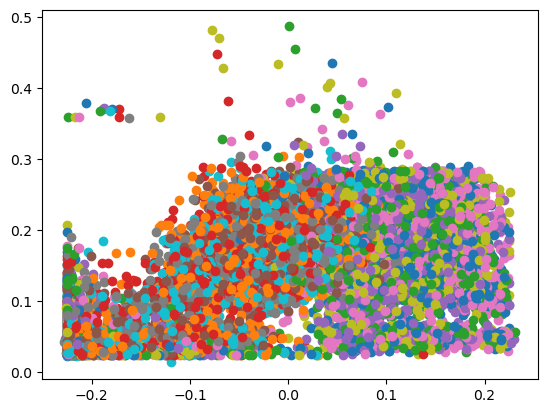

In [14]:
for i in range(1000):
    plt.scatter(all_rollouts[-1].obs[0][:,4,i,2].cpu(), all_rollouts[-1].obs[0][:,4,i,3].cpu())

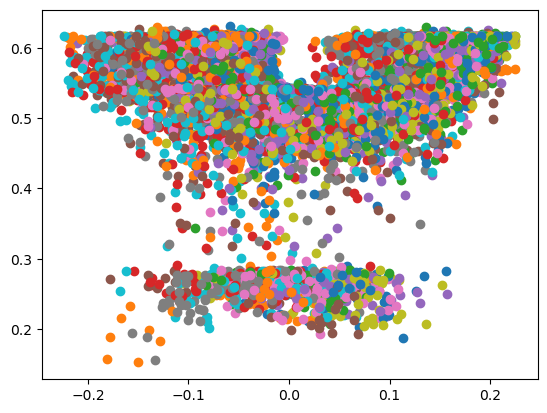

In [15]:
for i in range(1000):
    plt.scatter(all_rollouts[0].obs[0][:,4,i,2].cpu(), all_rollouts[0].obs[0][:,4,i,3].cpu())

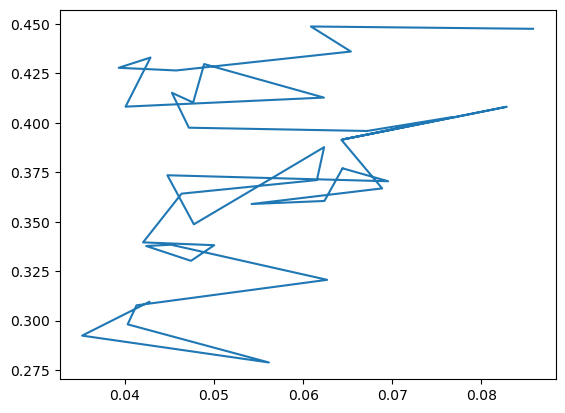

In [16]:
for i in range(1):
    plt.plot(all_rollouts[-3].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-3].obs[0][:,:,i,3].cpu().reshape(-1))
    #plt.plot(all_rollouts[-2].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-2].obs[0][:,:,i,3].cpu().reshape(-1))
    #plt.plot(all_rollouts[-1].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-1].obs[0][:,:,i,3].cpu().reshape(-1))

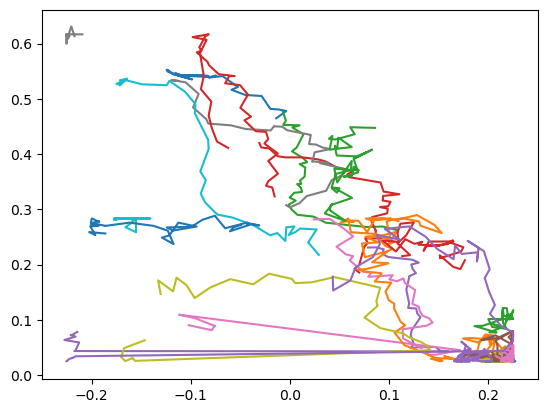

In [17]:
for i in range(1):
    for j in range(len(all_rollouts)):
        plt.plot(all_rollouts[j].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[j].obs[0][:,:,i,3].cpu().reshape(-1))

## Try out a heatmap

In [18]:
test_data = all_rollouts[-1].obs[0][:,0,0,2:4].cpu()

In [19]:
test_data = torch.round(test_data*100)

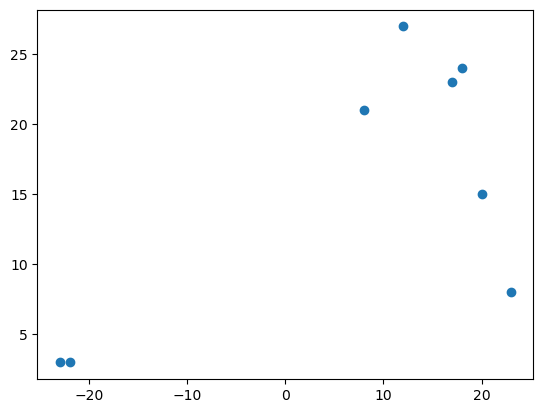

In [20]:
plt.scatter(test_data[:,0],test_data[:,1])

In [21]:
x_data = torch.round(all_rollouts[-1].obs[0][:,:,:,2].cpu().flatten()*100)

In [22]:
y_data = torch.round(all_rollouts[-1].obs[0][:,:,:,3].cpu().flatten()*100)

In [23]:
positions, counts = torch.unique(torch.stack([x_data,y_data]),dim=-1,return_counts=True)

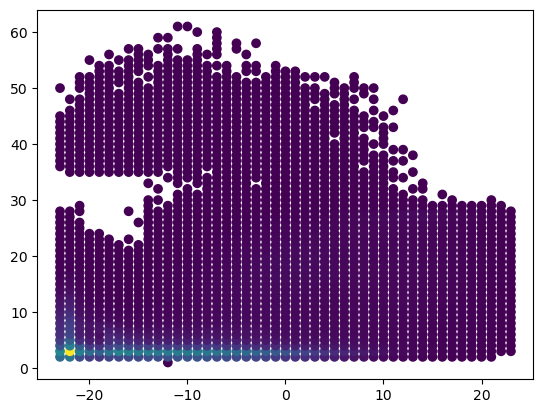

In [24]:
plt.scatter(positions[0], positions[1], c = counts)

In [25]:
x_data = torch.round(all_rollouts[-1].obs[0][:,:,:,2].cpu().flatten()*100)

In [26]:
y_data = torch.round(all_rollouts[-1].obs[0][:,:,:,3].cpu().flatten()*50)

In [27]:
positions, counts = torch.unique(torch.stack([x_data,y_data]),dim=-1,return_counts=True)

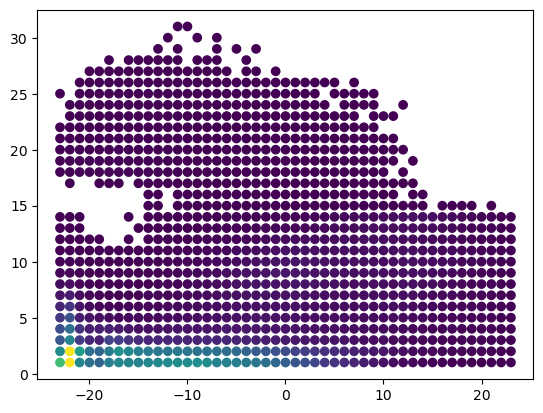

In [28]:
plt.scatter(positions[0], positions[1], c = counts)

# Understand other positions in the state

In [40]:
all_rollouts[-1].obs[0].shape # Self obs

torch.Size([8, 5, 16384, 8])

In [41]:
all_rollouts[-1].obs[1].shape # Partner obs: polar direction of partner [0,1], boolean of whether or not the partner is grabbing block [2]

torch.Size([8, 5, 16384, 1, 3])

In [42]:
all_rollouts[-1].obs[2].shape # Room ent obs: a list of objects, with polar direction of partner [0,1] and enum of object type [2]

torch.Size([8, 5, 16384, 6, 3])

In [44]:
all_rollouts[-1].obs[3].shape # Door obs: polar direction of door [0,1], boolean of whether or not the door is open

torch.Size([8, 5, 16384, 3])

In [46]:
all_rollouts[-1].obs[4].shape # Lidar

torch.Size([8, 5, 16384, 30, 2])

In [45]:
all_rollouts[-1].obs[3][0,:,0,:]

tensor([[ 0.1895, -0.7832,  0.0000],
        [ 0.1866, -0.7455,  0.0000],
        [ 0.1948, -0.7251,  0.0000],
        [ 0.2060, -0.7401,  0.0000],
        [ 0.1916, -0.6551,  0.0000]], device='cuda:0')

# Start plotting value function

In [31]:
all_rollouts[-1].values.shape

torch.Size([8, 5, 16384, 1])

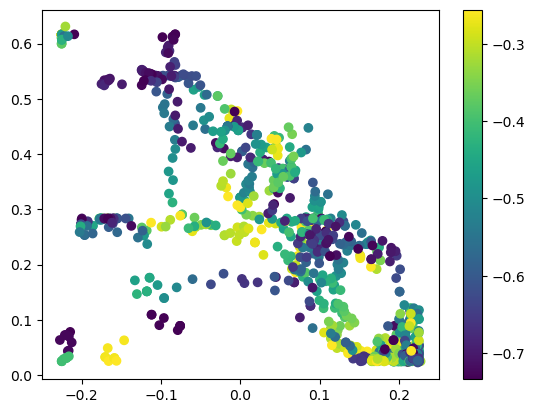

In [34]:
for i in range(1):
    for j in range(len(all_rollouts)):
        plt.scatter(all_rollouts[j].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[j].obs[0][:,:,i,3].cpu().reshape(-1), c=all_rollouts[j].values[:,:,i].cpu().reshape(-1))
plt.colorbar()